In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Advertising.csv")

In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
### drop teh variable

df= df.drop("Unnamed: 0", axis=1)

In [6]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [8]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [9]:
df.shape

(200, 4)

In [10]:
### numerical variable preprocessing

df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
import seaborn as sns

<AxesSubplot:xlabel='TV', ylabel='Count'>

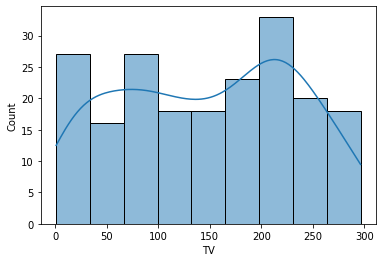

In [14]:
sns.histplot(df["TV"], kde=True)

<AxesSubplot:xlabel='newspaper', ylabel='Count'>

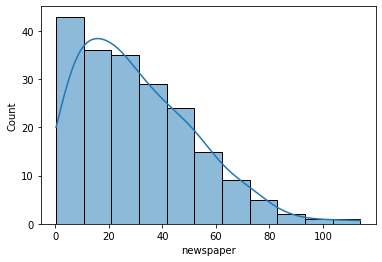

In [16]:
sns.histplot(df["newspaper"], kde=True)

In [17]:
### how to transform skewed variable

df["newspaper"] = np.log1p(df["newspaper"])

<AxesSubplot:xlabel='newspaper', ylabel='Count'>

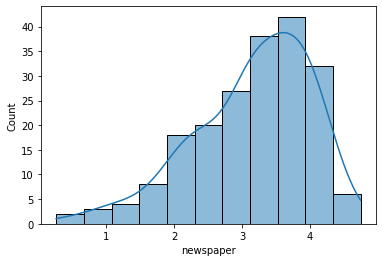

In [18]:
sns.histplot(df["newspaper"], kde=True)

In [19]:

df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,3.153164,14.022500
std,85.854236,14.846809,0.866508,5.217457
min,0.700000,0.000000,0.262364,1.600000
25%,74.375000,9.975000,2.621019,10.375000
50%,149.750000,22.900000,3.286519,12.900000
75%,218.825000,36.525000,3.830813,17.400000
max,296.400000,49.600000,4.744932,27.000000


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='newspaper'>

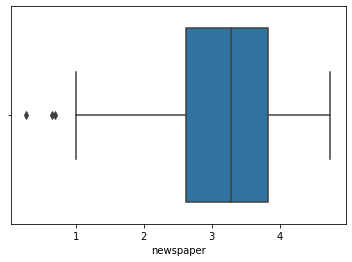

In [20]:
sns.boxplot(df["newspaper"])

In [21]:
### scaling

from sklearn.preprocessing import MinMaxScaler

mn = MinMaxScaler()
df_num = mn.fit_transform(df[["TV", "newspaper", "radio"]])

In [23]:
df_num_df = pd.DataFrame(df_num, index = df.index, columns=["TV", "newspaper", "radio"])

In [24]:
df_num_df.head()

,TV,newspaper,radio
0,0.775786,0.889888,0.762097
1,0.148123,0.796072,0.792339
2,0.055800,0.890206,0.925403
3,0.509976,0.852996,0.832661
4,0.609063,0.852621,0.217742


In [25]:
df_num_df.describe()

,TV,newspaper,radio
count,200.000000,200.000000,200.000000
mean,0.494902,0.644898,0.469032
std,0.290342,0.193306,0.299331
min,0.000000,0.000000,0.000000
25%,0.249155,0.526184,0.201109
50%,0.504058,0.674648,0.461694
75%,0.737656,0.796072,0.736391
max,1.000000,1.000000,1.000000


In [26]:
X = df[["TV", "newspaper", "radio"]]
y = df["sales"]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=20)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr= LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [31]:
pred = lr.predict(X_test)

In [32]:
pred

array([18.2564881 , 19.27481229,  8.79968219, 15.85082142, 19.3822815 ,
       17.24132894, 12.21893374,  8.15804024, 21.56491661,  5.51136538,
       11.54819127, 13.81437613, 16.99975357, 11.03317638, 20.74489437,
       24.68026387,  5.39920762, 13.28382236,  8.17711087,  4.74706772,
       19.82680335, 16.23945005, 17.10828301, 23.21546968, 20.70469122,
        8.92132109, 14.95767669, 10.92400635, 12.88697531, 15.29873995,
        7.55750112, 19.3614432 ,  9.19071573, 10.5499912 , 24.10428431,
       15.29702645,  9.99513793,  9.05601343, 11.68480885, 13.62398082])

In [33]:
##
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
r2_score(y_test, pred)

0.9024291050511649

In [35]:
mean_absolute_error(y_test, pred)

1.4321295314915554

In [37]:
mean_squared_error(y_test, pred)

3.531149230735312

In [39]:
r2_score(y_train, lr.predict(X_train))

0.8942537271153677

In [40]:
lr.coef_

array([0.04421328, 0.11270284, 0.18795371])

In [42]:
X.columns

Index(['TV', 'newspaper', 'radio'], dtype='object')